# Intro to cheminformatics with RDkit


<div class="alert alert-block alert-info">
<h2>Objectives:</h2>

* Import packages/libraries

* Review basic data types
    * string (str): text characters
    * integer (int): whole number
    * floating point number (float): number with a decimal

* New data types:
    * dictionary
    * dataframe

* Run and define functions
    * `print()`
    * `type()`
    * `Chem.MolFromSmiles()`
    * `Chem.Draw.MolToImage()`
    * `Descriptors.ExactMolWt()`
    
* RDKit library
* Pandas library

</div>

There are Python libraries that are made for working just with chemical data. One commonly used library in Python for data science (or cheminformatics) is called [RDKit](https://en.wikipedia.org/wiki/RDKit).

RDKit provides a molecule object that allows you to manipulate chemical structures. It has capabilities for reading and writing molecular file formats, calculating molecular properties, and performing substructure searches. In addition, it offers a wide range of cheminformatics algorithms such as molecular fingerprint generation, similarity metrics calculation, and molecular descriptor computation. This notebook will only introduce a few RDKit basics.

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Python Objects</strong>

Most of this functionality is achieved through the RDKit `mol` object. In Python, we use the word "object" to refer to a variable type with associated data and methods. 
One example of an object we have seen in notebooks is a list - we could also call it a "list object". An object has `attributes` (data) and `methods`. 
You access information about objects with the syntax
```python
object.data
```
where data is the attribute name.

You acceess object methods with the syntax
```python
object.method(arguments)
```

For example, for a list "`append` is a method that was covered in the introductory lesson.

```
my_list = []
my_list.append(1) # "append" is a method
```
</div>    

In this lesson, we will create and manipulate RDKit `mol` objects. RDKit `mol` objects represent molecules and have
attributes (data) and methods (actions) associated with molecules.

We are going to use a part of RDKit called `Chem`. To use `Chem`, we first have to import it. 

In [27]:
import rdkit
from rdkit import Chem

## Creating Molecules with RDKit

Throughout this tutorial, it will be helpful to have access to the [RDKit documentation](https://www.rdkit.org/docs/index.html). 

To get information about molecules in RDKit, we have to first create objects representing molecules. We will use SMILES strings to create our `mol` objects, though RDKit also has methods for creating molecules from the file formats.

### Creating molecules using SMILES

We can create a representation of ibuprofen using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [28]:
ibuprofen_smiles = 'CC(Cc1ccc(cc1)C(C(=O)O)C)C'

print(ibuprofen_smiles)
type(ibuprofen_smiles)


CC(Cc1ccc(cc1)C(C(=O)O)C)C


str

In [30]:
ibuprofen = Chem.MolFromSmiles(ibuprofen_smiles)

Let's try to see what the `Chem.MolFromSmiles()` function generated using the `print()` and `type()` functions.

In [21]:
print(ibuprofen)

The `print()` function doesn't known how to represent this object. Instead it informed us that the variable `ibuprofen` is an RDkit `mol` object that is stored in our computers memory at the address `0x7fd4ec3a69d0`.

We need to use the RDkit methods to interact with the `mol` object. We can visualize the molecule using the `Chem.Draw.MolToImage()` function.

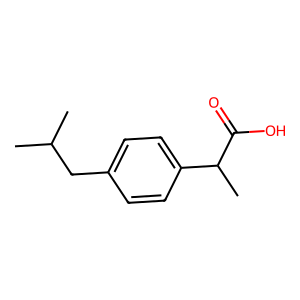

In [13]:
Chem.Draw.MolToImage(ibuprofen)

Luckily, Jupyter is smart, so we can also display a `mol` object by putting ia as the last thing in a cell.

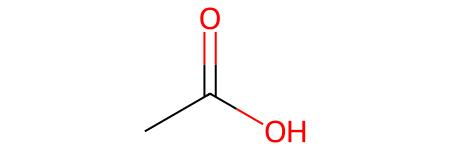

In [22]:
acetic_acid = Chem.MolFromSmiles("CC(=O)O")
acetic_acid

## Working with RDKit Molecules

RDKit molecule objects have a number of methods we can use to get more information about the molecule.
In the next few cells, we'll look at some methods that can tell us some things about the molecules we've created.

<div class="alert alert-block alert-success"> 
<strong>Jupyter Skills: The Tab Key</strong>

When working with Python objects in the Jupyter notebook, you can type a variable or object name to see the methods available on that object.

In the cell below, type `ibuprofen.` (include a (`.`) at the end), then press the `tab` key. 
A list of possible methods and attributes will come up.

Look through the methods until you find one that gives you the number of atoms in the molecule.

</div>

**NOTE:** Methods are functions so they require parentheses at the end.

```python
object.method()
```

In [27]:
# Pick a method that will determine the number of atom in ibuprofen.

acetic_acid.GetNumAtoms()

4

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Getting Help</strong>

Is this the number of atoms you expected for a acetic_acid molecule? 

We can use the `help` function on the method you found in the previous step to find a method argument to figure out a method argument to get the number of atoms we expect.

</div>

In [33]:
help(acetic_acid.GetNumAtoms)

Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)self [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.

          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated


        C++ signature :
            int GetNumAtoms(RDKit::ROMol [,int=-1 [,bool=True]])



In [34]:
# Add an argument to your function to get the number of 
# atoms that gives you the total number of atoms in acetic_acid
# including hydrogens
acetic_acid.GetNumAtoms(onlyExplicit=False)

8

Each molecule is made up of RDKit atom objects and RDKit bond objects.
If we want to get the atoms for a particular molecule, we can use the `GetAtoms` method.

## Molecular Descriptors

A molecular descriptor is a numerical value that represents some property of a molecule.

Descriptors can be 0 dimensional (molecular weight, number of heavy atoms, etc.), 1 dimensional (counts of atom types, hydrogen bond donors/acceptors), 2 dimensional (fingerprints, other graph representations), 3 dimensional (polar surface area).

RDKit supports the calculation of many molecular descriptors. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html).

To get molecular descriptors from RDKit, we import the `rdMolDescriptors` module.

```python
from rdkit.Chem import rdMolDescriptors
```

To get a descriptor, you do:

```python
rdMolDescriptors.descriptor_name(molecule_variable)

```

For example, we can calculate the molecular weight of our ibuprofen molecule

In [31]:
from rdkit.Chem import rdMolDescriptors

ibuprofen_mw = rdMolDescriptors.CalcExactMolWt(ibuprofen)
print(ibuprofen_mw)

206.130679816


Here are some examples of other descriptors that RDkit can calculate.
____

`rdMolDescriptors.CalcExactMolWt((Mol)mol[, (bool)onlyHeavy=False]) → float :`

returns the molecule’s exact molecular weight

`rdMolDescriptors.CalcNumAtoms((Mol)mol) → int :`

returns the total number of atoms for a molecule

`rdMolDescriptors.CalcFractionCSP3((Mol)mol) → float :`

returns the fraction of C atoms that are SP3 hybridized

`rdMolDescriptors.CalcMolFormula((Mol)mol) → str :`

returns the molecule’s formula

`rdMolDescriptors.CalcNumAliphaticCarbocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule

`rdMolDescriptors.CalcNumAliphaticHeterocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule

`rdMolDescriptors.CalcNumAromaticRings((Mol)mol) → int :`

returns the number of aromatic rings for a molecule

`rdMolDescriptors.CalcNumAtomStereoCenters((Mol)mol) → int :`

Returns the total number of atomic stereocenters (specified and unspecified)

`rdMolDescriptors.CalcNumHBA((Mol)mol) → int :`

returns the number of H-bond acceptors for a molecule

`rdMolDescriptors.CalcNumHBD((Mol)mol) → int :`

returns the number of H-bond donors for a molecule
```

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Write a function that uses function in the `rdMolDescritors` module to calculate >=3 properties for a molecule. The function should take a `mol` object as an argument and print the properties you calculate.

</div>

In [94]:
def get_properties(mol : rdkit.Chem.rdchem.Mol):
    MW = rdMolDescriptors.CalcExactMolWt(mol)
    HBD = rdMolDescriptors.CalcNumHBD(mol)
    HBA = rdMolDescriptors.CalcNumHBA(mol)
    ALOGP = rdMolDescriptors.CalcCrippenDescriptors(mol)[0]
    print(f'MW: {MW}, HBD: {HBD}, HBA: {HBA}, ALogP: {ALOGP}')

In [95]:
ibuprofen_properties = get_properties(ibuprofen)

MW: 206.130679816, HBD: 1, HBA: 1, ALogP: 3.073200000000001


## Pandas/Dataframes

[Pandas](https://pandas.pydata.org/docs/) is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas. 

The central data structure of pandas is called a DataFrame. Pandas DataFrames work very closely with NumPy arrays and Pandas dataframes are specifically for data which is two dimensional (rows and columns). NumPy arrays, while similar in some ways, can work with higher dimensional data. 

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis. We are going to be looking at a dataset which gives information about the elements in the periodic table.

In [21]:
import pandas as pd
from rdkit.Chem import PandasTools, QED


### HIDE

# Create dataframe populated with SMILES strings for common drugs
drugs = {
    'name': ['ibuprofen', 'caffeine', 'aspirin', 'penicillin'],
    'SMILES': [
        'CC(Cc1ccc(cc1)C(C(=O)O)C)C',
        'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
        'CC(=O)OC1=CC=CC=C1C(=O)O',
        'CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C',
        ],
}
drug_properties = pd.DataFrame.from_dict(drugs)
PandasTools.AddMoleculeColumnToFrame(drug_properties, smilesCol='SMILES', molCol='Mol')

def get_qed_properties(df : pd.DataFrame, molcol : str):
    df['MW'] = df[molcol].apply(lambda x: QED.properties(x)[0])
    df['ALOGP'] = df[molcol].apply(lambda x: QED.properties(x)[1])
    df['HBA'] = df[molcol].apply(lambda x: QED.properties(x)[2])
    df['HBD'] = df[molcol].apply(lambda x: QED.properties(x)[3])
    df['PSA'] = df[molcol].apply(lambda x: QED.properties(x)[4])
    df['ROTB'] = df[molcol].apply(lambda x: QED.properties(x)[5])
    df['AROM'] = df[molcol].apply(lambda x: QED.properties(x)[6])
    df['ALERTS'] = df[molcol].apply(lambda x: QED.properties(x)[7])

    return df


drug_properties = get_qed_properties(drug_properties, 'Mol')
###

## DataFrame.Head()

,name,SMILES,Mol,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS
0,ibuprofen,CC(Cc1ccc(cc1)C(C(=O)O)C)C,,206.285,3.0732,2,1,37.30,4,1,0
1,caffeine,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,,194.194,-1.0293,3,0,61.82,0,2,0
2,aspirin,CC(=O)OC1=CC=CC=C1C(=O)O,,180.159,1.3101,4,1,63.60,2,1,2
3,penicillin,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)CC3=CC...,,334.397,0.8608,5,2,86.71,4,1,1

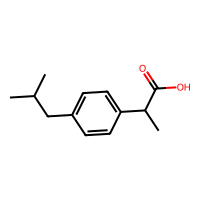
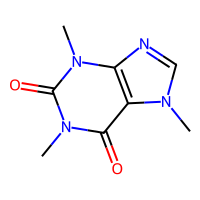
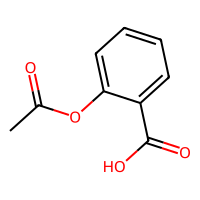
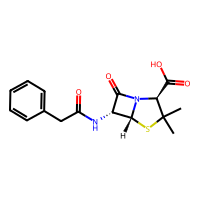

In [24]:
drug_properties

## DataFrame.describe()

In [23]:
drug_properties.describe()

,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.000000
mean,228.758750,1.053700,3.500000,1.000000,62.357500,2.500000,1.25,0.750000
std,71.230066,1.685252,1.290994,0.816497,20.188737,1.914854,0.50,0.957427
min,180.159000,-1.029300,2.000000,0.000000,37.300000,0.000000,1.00,0.000000
25%,190.685250,0.388275,2.750000,0.750000,55.690000,1.500000,1.00,0.000000
50%,200.239500,1.085450,3.500000,1.000000,62.710000,3.000000,1.00,0.500000
75%,238.313000,1.750875,4.250000,1.250000,69.377500,4.000000,1.25,1.250000
max,334.397000,3.073200,5.000000,2.000000,86.710000,4.000000,2.00,2.000000


## more pandas stuff

In [87]:
import pandas as pd

caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
penicillin = Chem.MolFromSmiles("CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C")

drugs = [ibuprofen, caffeine, aspirin, penicillin]
drug_properties = []
for drug in drugs:
    drug_properties.append(get_properties(drug))

df = pd.DataFrame(drug_properties)

In [88]:
df

,MW,HBD,HBA,ALogP
0,206.130680,1,1,3.0732
1,194.080376,0,6,-1.0293
2,180.042259,1,3,1.3101
3,334.098728,2,4,0.8608


In [89]:
df.describe()

,MW,HBD,HBA,ALogP
count,4.000000,4.000000,4.000000,4.000000
mean,228.588011,1.000000,3.500000,1.053700
std,71.143775,0.816497,2.081666,1.685252
min,180.042259,0.000000,1.000000,-1.029300
25%,190.570846,0.750000,2.500000,0.388275
50%,200.105528,1.000000,3.500000,1.085450
75%,238.122692,1.250000,4.500000,1.750875
max,334.098728,2.000000,6.000000,3.073200


RDKit provides hundreds of molecular descriptors.
You can calculate all of the molecular descriptors for a molecule at once using `Descriptors.CalcMolDescriptors`.

As an example of how we can apply molecular descriptors to make predictions, we will consider Lipinski's Rule of 5.
Lipinski's Rule of 5 is a **guideline** that helps determine if a drug is likely to be absorbed well by the body. It states that good oral drugs typically have no more than 5 hydrogen bond donors, 10 hydrogen bond acceptors, a molecular weight under 500 daltons, and a log P (measure of solubility) under 5.

* Molecular Weight <= 500 Da
* No. Hydrogen Bond Donors <= 5
* No. Hydrogen Bond Acceptors <= 10
* LogP <= 5

In [58]:
ibuprofen_qed = Chem.QED.properties(ibuprofen)
type(ibuprofen_qed)

rdkit.Chem.QED.QEDproperties

In [69]:
ibprofen_properties['num_atoms'] = num_atoms
ibprofen_properties['mw'] = mw

In [70]:
print(ibprofen_properties)
type(ibprofen_properties)

{'num_atoms': 15, 'mw': 206.130679816}


dict

In [81]:
print(rdMolDescriptors.CalcMolFormula(mol))

C13H18O2


In [76]:
print(rdMolDescriptors.CalcNumAliphaticCarbocycles(mol))

0


In [85]:
def get_properties(mol : rdkit.Chem.rdchem.Mol):
    properties = {}
    properties['MW'] = rdMolDescriptors.CalcExactMolWt(mol)
    properties['HBD'] = rdMolDescriptors.CalcNumHBD(mol)
    properties['HBA'] = rdMolDescriptors.CalcNumHBA(mol)
    properties['ALogP'] = rdMolDescriptors.CalcCrippenDescriptors(mol)[0]
    return properties

# Iterator module

Can include if we have enough time

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Iterators</strong>

When we look at the results of the `GetAtoms` method, it tells us that we have a `GetAtomsIterator`.
In Python, an iterator is an object that contains values that can be looped through and indexed in.

Although we haven't used this terminology before, a Python list is an example of an iterator.

</div>

Like a list, we can also call `len` on the iterator.

In [ ]:
len(acetic_acid_atoms)

4

Because `acetic_acid_atoms` is an iterator, we can use indexing to get a particular atom.
Atoms in RDKit molecules are represented by Atom objects.

In [ ]:
atom = acetic_acid_atoms[0]
atom

When we examine one atom, we see there that there are many methods associated with the atom. 
For example, we can print the atom element or atom hybridization.

In [ ]:
print(atom.GetSymbol())
print(atom.GetHybridization())

O
SP2


We can use a for loop to give information about each atom.

In [ ]:
for atom in acetic_acid_atoms:
    print(f"Atom {atom.GetSymbol()} has hybridization {atom.GetHybridization()}")

Atom C has hybridization SP3
Atom C has hybridization SP2
Atom O has hybridization SP2
Atom O has hybridization SP2


Bonds are also objects in RDKit, and we can iterate over them the same way we can iterate over atoms.

In [ ]:
acetic_acid_bonds = acetic_acid.GetBonds()
bond = acetic_acid_bonds[0]
bond.GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Use a `for` loop to print information about each bond.
For each bond, you should print the starting atom symbol, the ending atom symbol,
and the bond type. 

Your output should look like the following:

```
Bond between C and C is a SINGLE bond.
Bond between C and O is a DOUBLE bond.
Bond between C and O is a SINGLE bond.
```

</div>

In [ ]:
for bond in acetic_acid_bonds:
    atom1 = bond.GetBeginAtom().GetSymbol()
    atom2 = bond.GetEndAtom().GetSymbol()
    print(f"Bond between {atom1} and {atom2} is a {bond.GetBondType()} bond.")